In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("cleaned_dataset_iqr.csv")


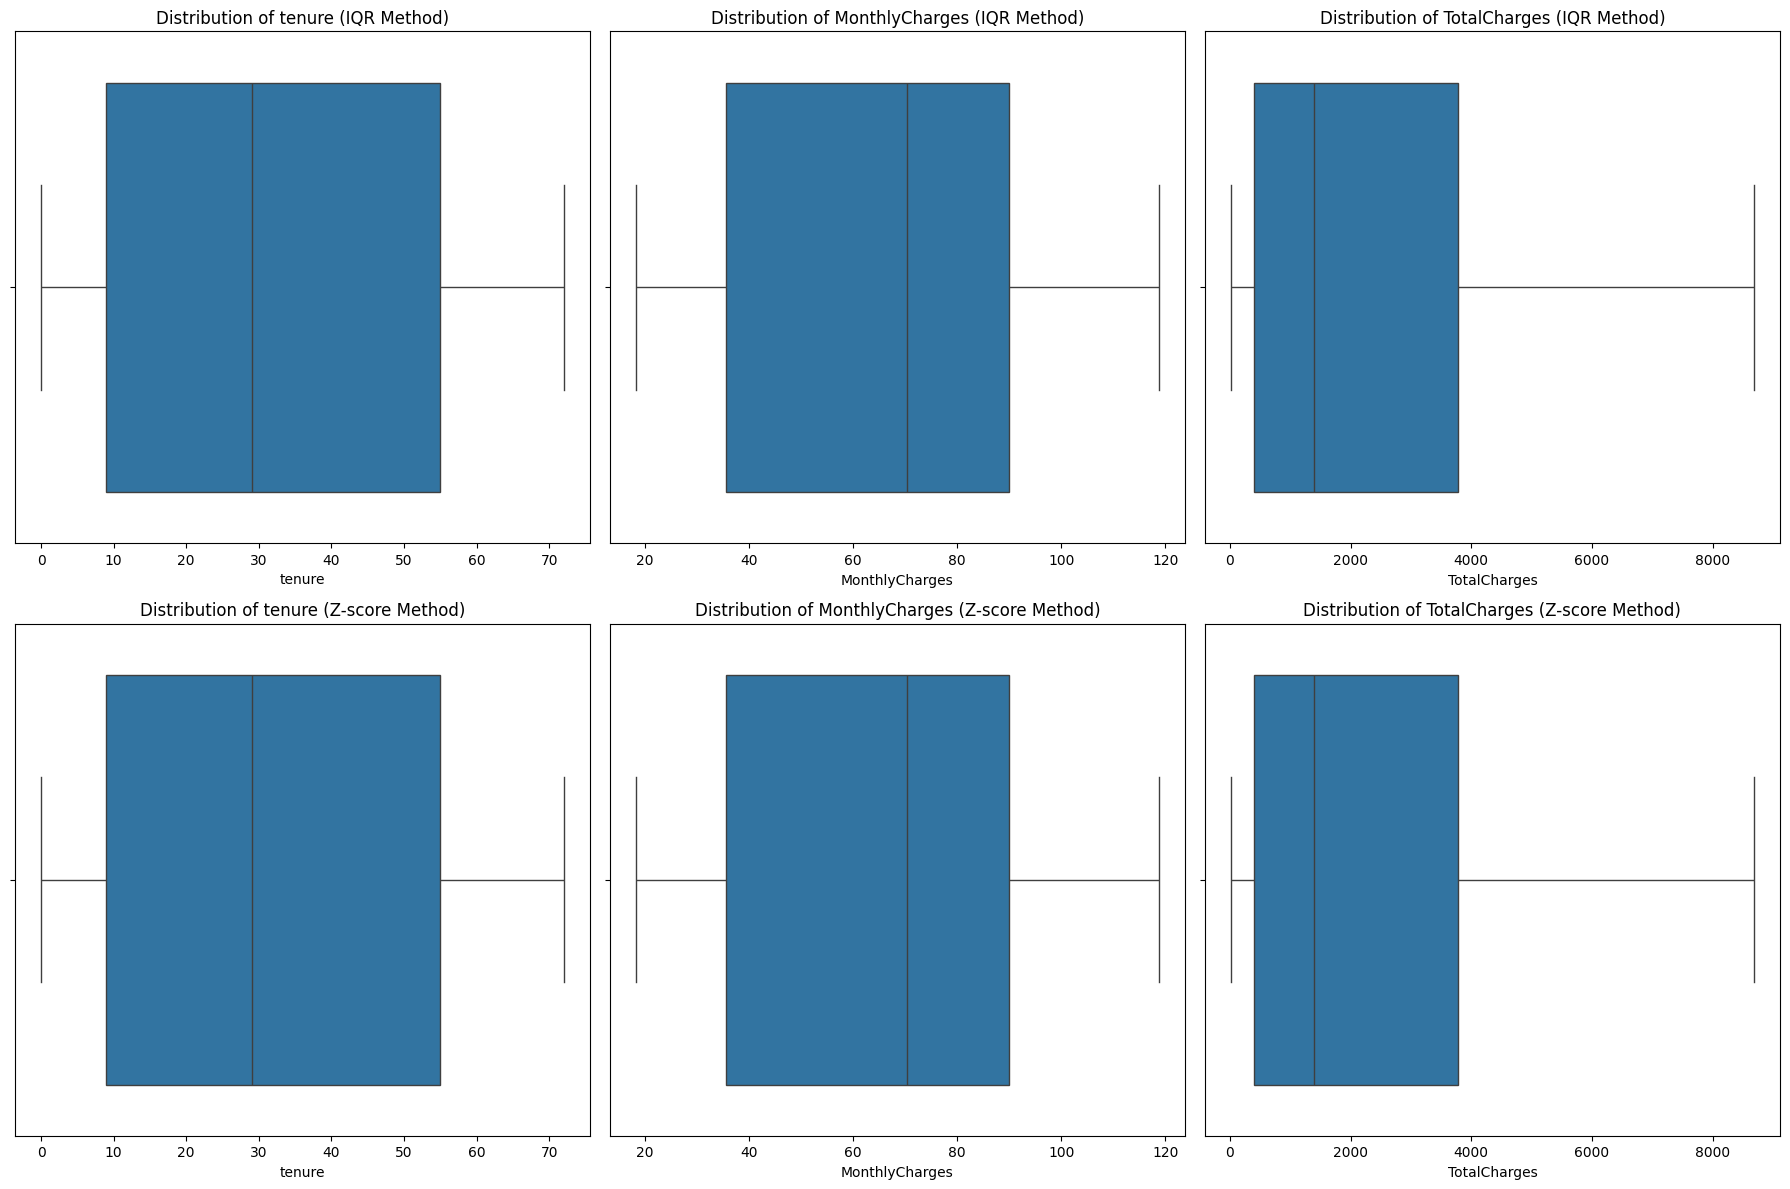

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(18, 12))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, len(numerical_columns), i)
    sns.boxplot(x=df[column])
    plt.title(f'Distribution of {column} (IQR Method)')
    
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, len(numerical_columns), i + len(numerical_columns))
    sns.boxplot(x=df[column])
    plt.title(f'Distribution of {column} (Z-score Method)')

plt.tight_layout()
plt.show()


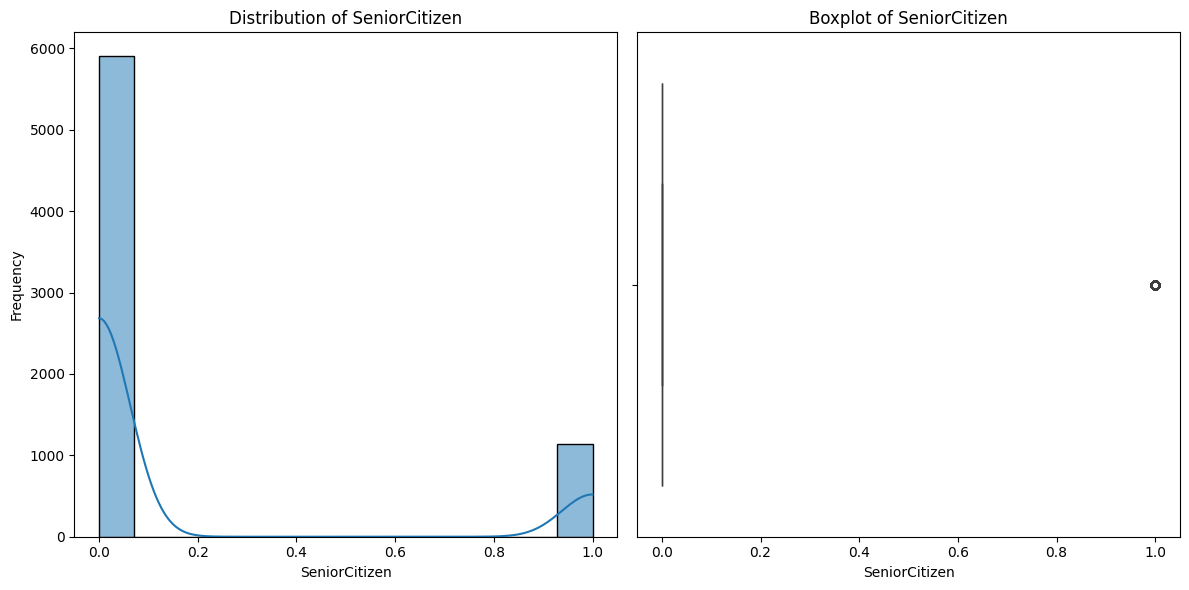

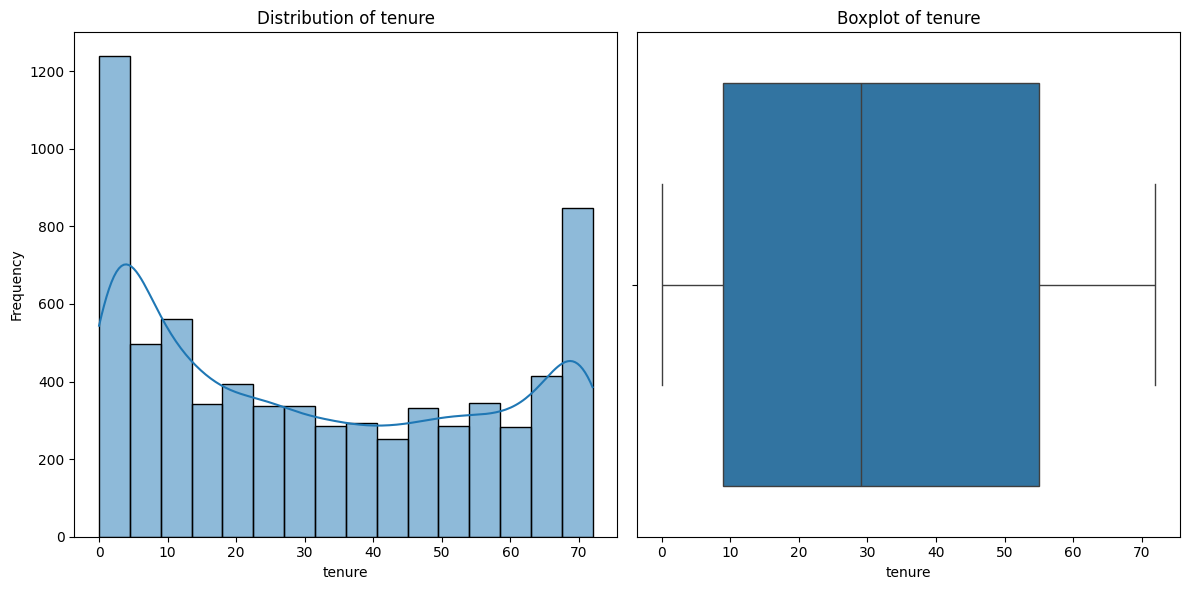

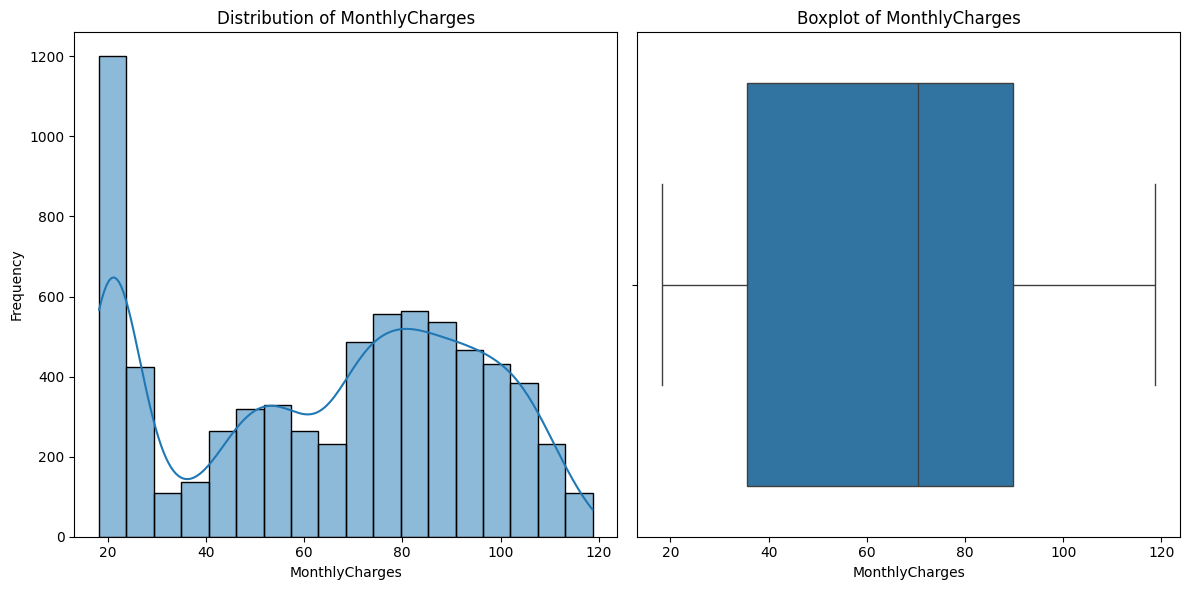

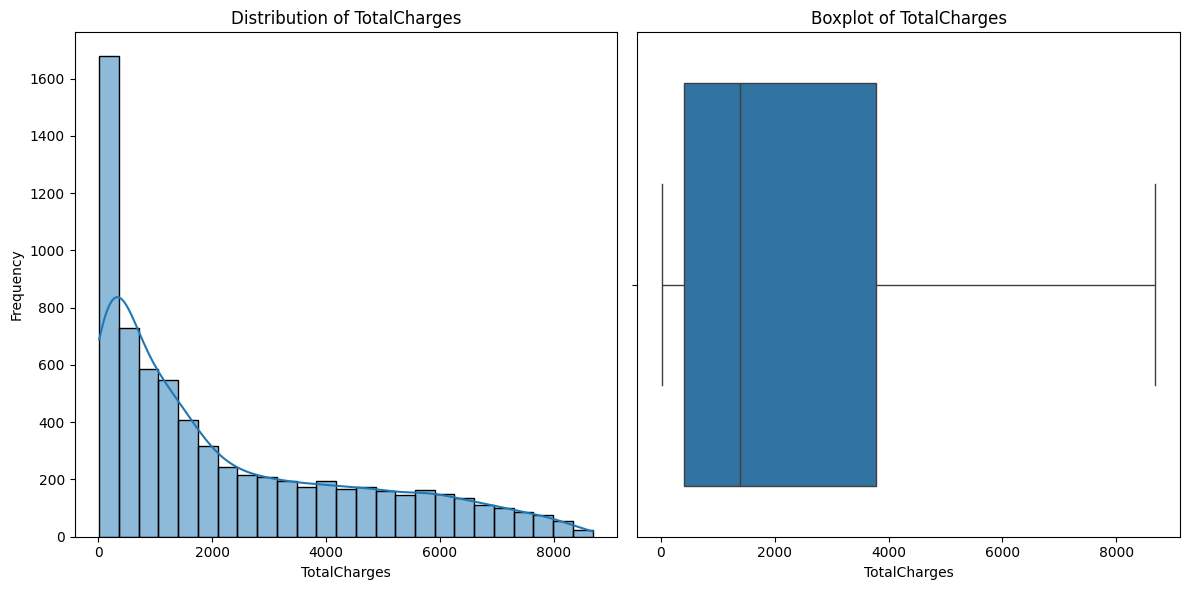

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
    plt.tight_layout()
    plt.show()


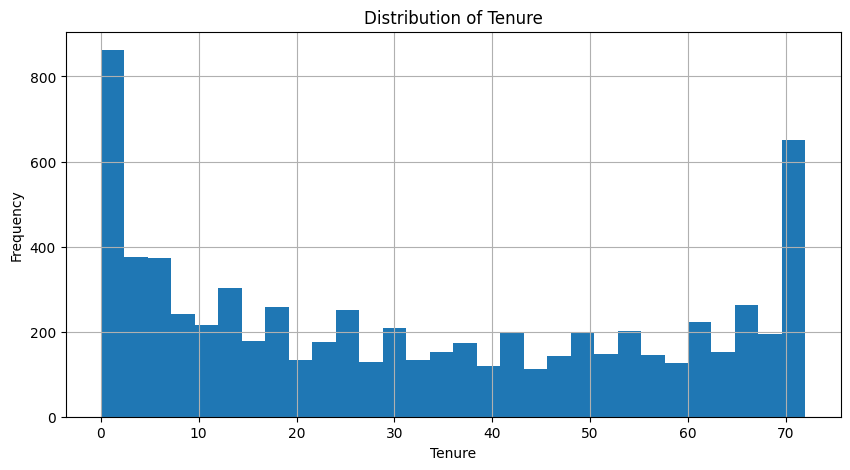

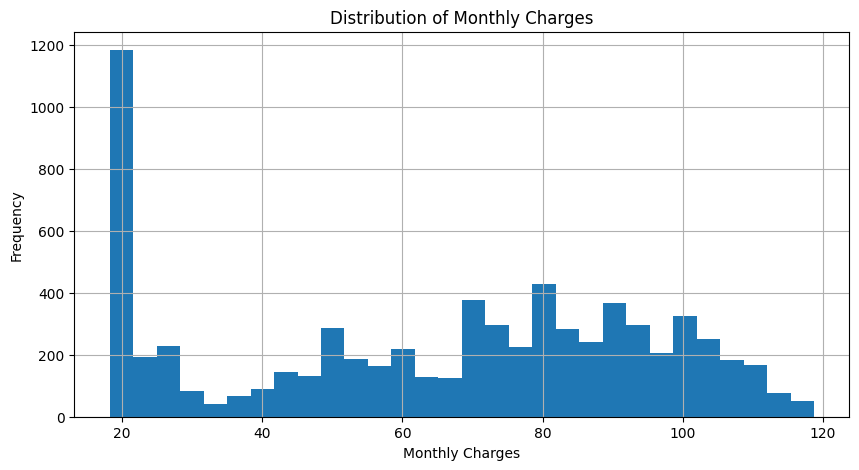

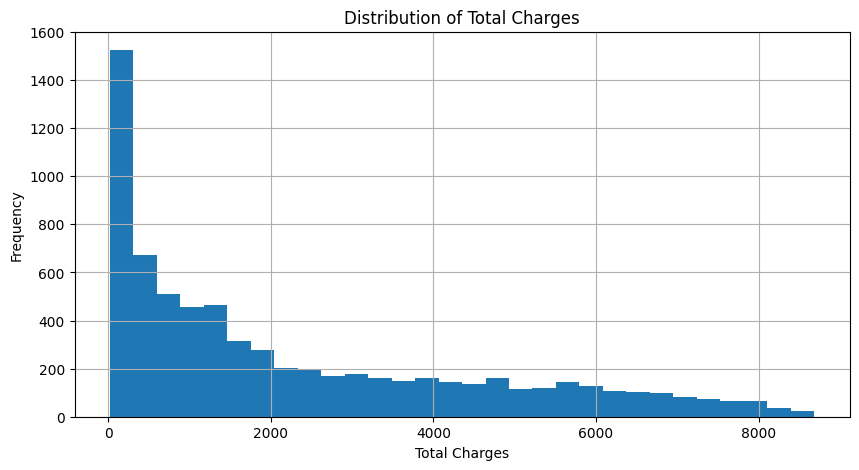

In [54]:


df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

numeric_columns = df.select_dtypes(include='number').columns


plt.figure(figsize=(10, 5))
df['tenure'].hist(bins=30)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
df['MonthlyCharges'].hist(bins=30)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
df['TotalCharges'].hist(bins=30)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact

df = pd.read_csv("cleaned_dataset_iqr.csv")

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

def plot_churn_distribution(churn_status):
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    if churn_status == 'Both':
        df['tenure'].hist(bins=30, alpha=0.7, label='Churn: Both', ax=axes[0])
        axes[0].set_title('Distribution of Tenure')
        axes[0].set_xlabel('Tenure')
        axes[0].set_ylabel('Frequency')
        axes[0].legend()
        
        df['MonthlyCharges'].hist(bins=30, alpha=0.7, label='Churn: Both', ax=axes[1])
        axes[1].set_title('Distribution of Monthly Charges')
        axes[1].set_xlabel('Monthly Charges')
        axes[1].set_ylabel('Frequency')
        axes[1].legend()
        
        df['TotalCharges'].hist(bins=30, alpha=0.7, label='Churn: Both', ax=axes[2])
        axes[2].set_title('Distribution of Total Charges')
        axes[2].set_xlabel('Total Charges')
        axes[2].set_ylabel('Frequency')
        axes[2].legend()
        
    else:
        df[df['Churn'] == churn_status]['tenure'].hist(bins=30, alpha=0.7, label=f'Churn: {churn_status}', ax=axes[0])
        axes[0].set_title('Distribution of Tenure')
        axes[0].set_xlabel('Tenure')
        axes[0].set_ylabel('Frequency')
        axes[0].legend()
        
        df[df['Churn'] == churn_status]['MonthlyCharges'].hist(bins=30, alpha=0.7, label=f'Churn: {churn_status}', ax=axes[1])
        axes[1].set_title('Distribution of Monthly Charges')
        axes[1].set_xlabel('Monthly Charges')
        axes[1].set_ylabel('Frequency')
        axes[1].legend()
        
        df[df['Churn'] == churn_status]['TotalCharges'].hist(bins=30, alpha=0.7, label=f'Churn: {churn_status}', ax=axes[2])
        axes[2].set_title('Distribution of Total Charges')
        axes[2].set_xlabel('Total Charges')
        axes[2].set_ylabel('Frequency')
        axes[2].legend()
    
    plt.tight_layout()
    plt.show()

churn_widget = widgets.Dropdown(
    options=['Yes', 'No', 'Both'],
    value='Both',
    description='Churn:',
    disabled=False,
)

interact(plot_churn_distribution, churn_status=churn_widget)


interactive(children=(Dropdown(description='Churn:', index=2, options=('Yes', 'No', 'Both'), value='Both'), Ou…

<function __main__.plot_churn_distribution(churn_status)>

In [56]:
 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact

df = pd.read_csv("cleaned_dataset_iqr.csv")

def plot_categorical_distribution(churn_status):
    categorical_columns = [
        'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod'
    ]
    
    for col in categorical_columns:
        plt.figure(figsize=(10, 5))
        if churn_status == 'Both':
            sns.countplot(data=df, x=col)
        else:
            sns.countplot(data=df[df['Churn'] == churn_status], x=col)
        plt.title(f'Count Plot of {col} (Churn: {churn_status})')
        plt.xticks(rotation=45)
        plt.show()

    churn_counts = df['Churn'].value_counts()
    if churn_status == 'Both':
        churn_counts_filtered = churn_counts
        title = 'Churn (Target) Distribution'
    else:
        churn_counts_filtered = df[df['Churn'] == churn_status]['Churn'].value_counts()
        title = f'Churn (Target) Distribution (Churn: {churn_status})'
    
    plt.figure(figsize=(6, 6))
    plt.pie(churn_counts_filtered, labels=churn_counts_filtered.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

churn_widget = widgets.Dropdown(
    options=['Yes', 'No', 'Both'],
    value='Both',
    description='Churn:',
    disabled=False,
)

interact(plot_categorical_distribution, churn_status=churn_widget)




interactive(children=(Dropdown(description='Churn:', index=2, options=('Yes', 'No', 'Both'), value='Both'), Ou…

<function __main__.plot_categorical_distribution(churn_status)>

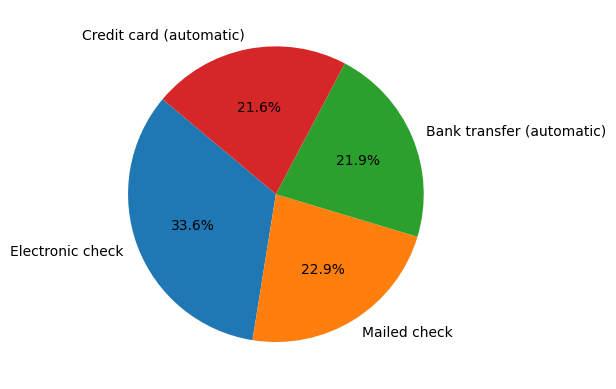

In [57]:
a=df["PaymentMethod"].value_counts()
plt.pie(a,labels=a.index,autopct='%1.1f%%', startangle=140)
plt.show()

In [58]:

import ipywidgets as widgets
from IPython.display import display

churn_yes = df[df['Churn'] == 'Yes']['PaymentMethod'].value_counts()
churn_no = df[df['Churn'] == 'No']['PaymentMethod'].value_counts()
def update_plot(churn_status):
    plt.figure(figsize=(6, 6))  
    if churn_status == 'Yes':
        plt.pie(churn_yes, labels=churn_yes.index, autopct='%1.1f%%', startangle=140)
        plt.title('Payment Method Distribution for Churn = Yes')
    else:
        plt.pie(churn_no, labels=churn_no.index, autopct='%1.1f%%', startangle=140)
        plt.title('Payment Method Distribution for Churn = No')
    plt.show()

churn_selector = widgets.Dropdown(
    options=['Yes', 'No'],
    value='Yes',
    description='Churn Status:',
    disabled=False,
)

widgets.interactive(update_plot, churn_status=churn_selector)


interactive(children=(Dropdown(description='Churn Status:', options=('Yes', 'No'), value='Yes'), Output()), _d…

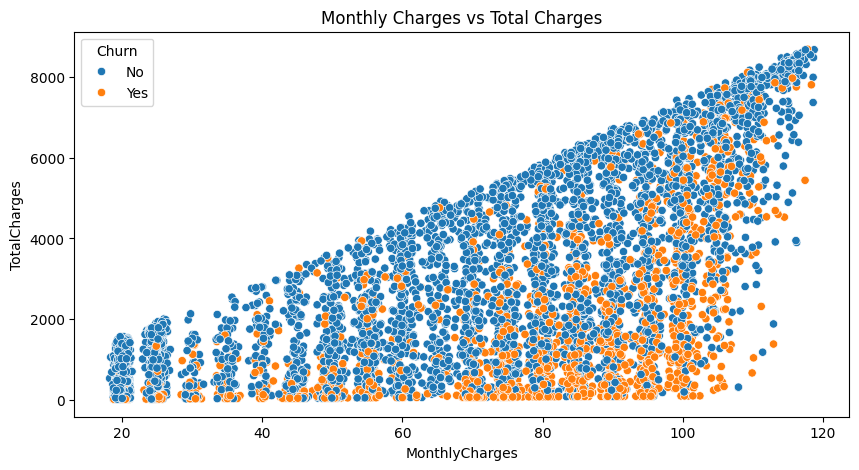

In [59]:

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')
plt.title('Monthly Charges vs Total Charges')
plt.show()

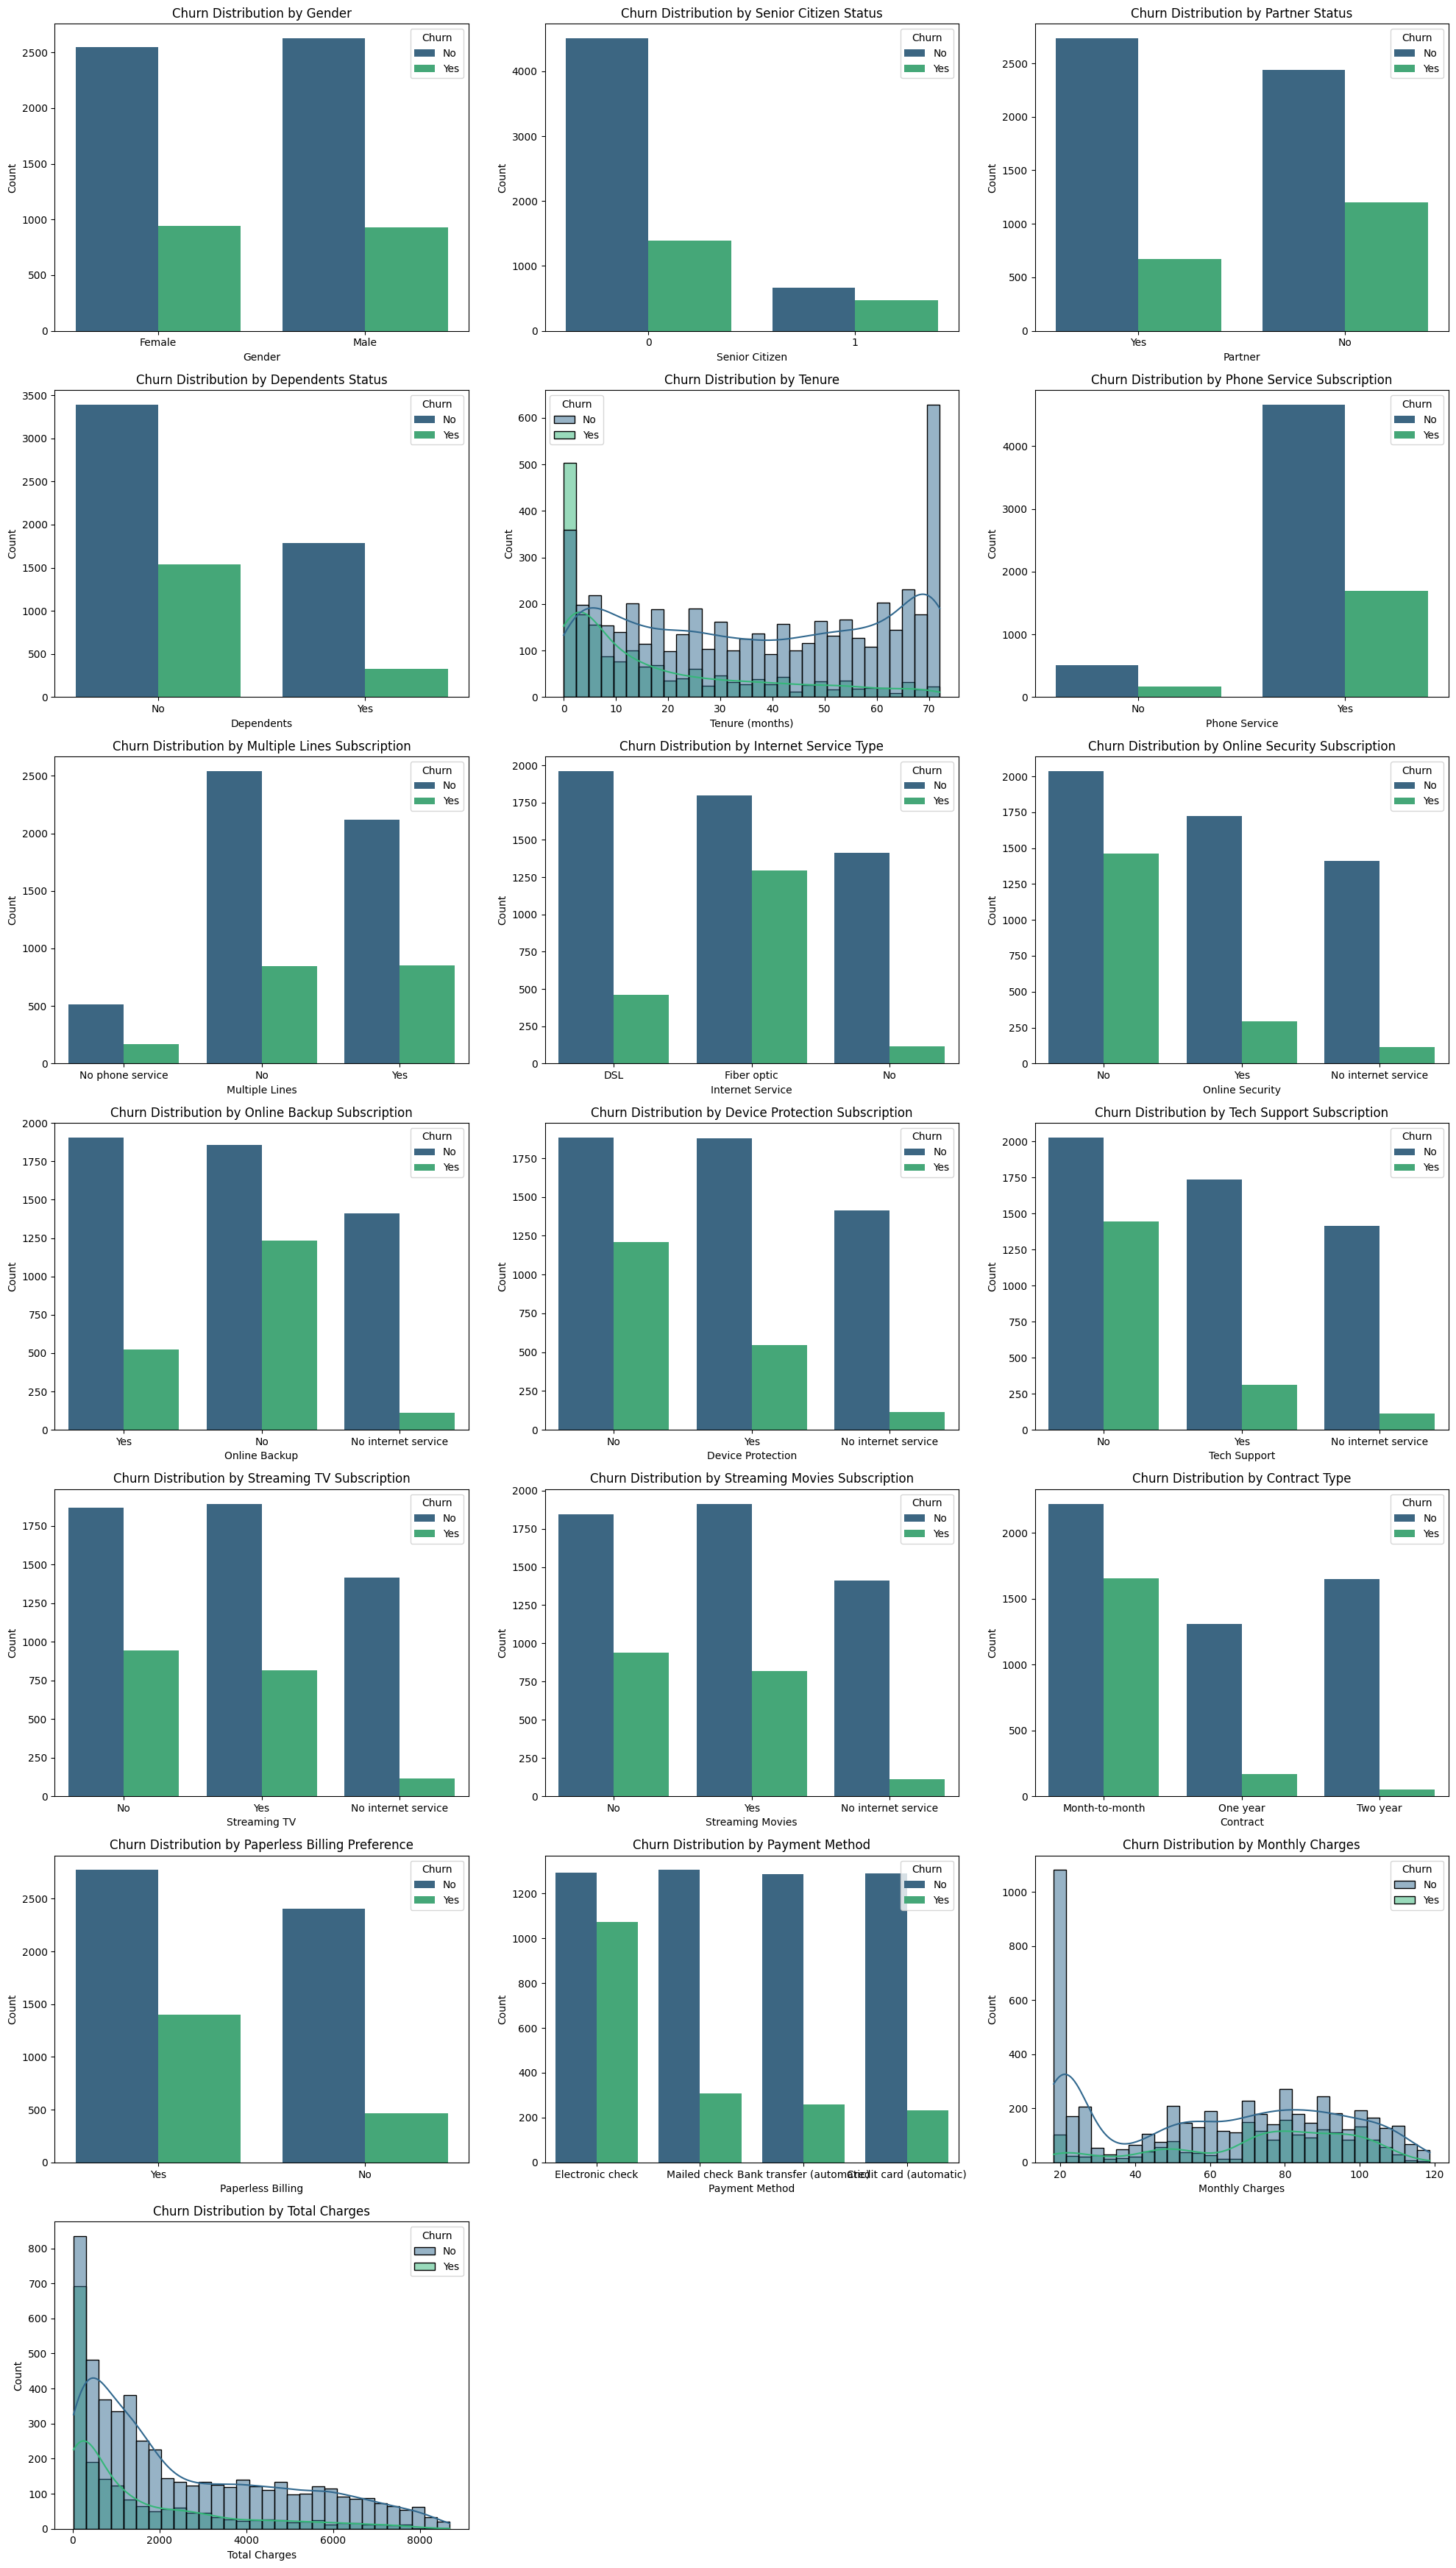

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("cleaned_dataset_iqr.csv")

fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(20, 35))

sns.countplot(ax=axes[0, 0], data=df, x='gender', hue='Churn', palette='viridis')
axes[0, 0].set_title('Churn Distribution by Gender')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='Churn', labels=['No', 'Yes'])

sns.countplot(ax=axes[0, 1], data=df, x='SeniorCitizen', hue='Churn', palette='viridis')
axes[0, 1].set_title('Churn Distribution by Senior Citizen Status')
axes[0, 1].set_xlabel('Senior Citizen')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='Churn', labels=['No', 'Yes'])

sns.countplot(ax=axes[0, 2], data=df, x='Partner', hue='Churn', palette='viridis')
axes[0, 2].set_title('Churn Distribution by Partner Status')
axes[0, 2].set_xlabel('Partner')
axes[0, 2].set_ylabel('Count')
axes[0, 2].legend(title='Churn', labels=['No', 'Yes'])

sns.countplot(ax=axes[1, 0], data=df, x='Dependents', hue='Churn', palette='viridis')
axes[1, 0].set_title('Churn Distribution by Dependents Status')
axes[1, 0].set_xlabel('Dependents')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Churn', labels=['No', 'Yes'])

sns.histplot(ax=axes[1, 1], data=df, x='tenure', hue='Churn', kde=True, palette='viridis', bins=30)
axes[1, 1].set_title('Churn Distribution by Tenure')
axes[1, 1].set_xlabel('Tenure (months)')
axes[1, 1].set_ylabel('Count')

sns.countplot(ax=axes[1, 2], data=df, x='PhoneService', hue='Churn', palette='viridis')
axes[1, 2].set_title('Churn Distribution by Phone Service Subscription')
axes[1, 2].set_xlabel('Phone Service')
axes[1, 2].set_ylabel('Count')
axes[1, 2].legend(title='Churn', labels=['No', 'Yes'])

sns.countplot(ax=axes[2, 0], data=df, x='MultipleLines', hue='Churn', palette='viridis')
axes[2, 0].set_title('Churn Distribution by Multiple Lines Subscription')
axes[2, 0].set_xlabel('Multiple Lines')
axes[2, 0].set_ylabel('Count')
axes[2, 0].legend(title='Churn', labels=['No', 'Yes'])

sns.countplot(ax=axes[2, 1], data=df, x='InternetService', hue='Churn', palette='viridis')
axes[2, 1].set_title('Churn Distribution by Internet Service Type')
axes[2, 1].set_xlabel('Internet Service')
axes[2, 1].set_ylabel('Count')
axes[2, 1].legend(title='Churn', labels=['No', 'Yes'])

sns.countplot(ax=axes[2, 2], data=df, x='OnlineSecurity', hue='Churn', palette='viridis')
axes[2, 2].set_title('Churn Distribution by Online Security Subscription')
axes[2, 2].set_xlabel('Online Security')
axes[2, 2].set_ylabel('Count')
axes[2, 2].legend(title='Churn', labels=['No', 'Yes'])

sns.countplot(ax=axes[3, 0], data=df, x='OnlineBackup', hue='Churn', palette='viridis')
axes[3, 0].set_title('Churn Distribution by Online Backup Subscription')
axes[3, 0].set_xlabel('Online Backup')
axes[3, 0].set_ylabel('Count')
axes[3, 0].legend(title='Churn', labels=['No', 'Yes'])

sns.countplot(ax=axes[3, 1], data=df, x='DeviceProtection', hue='Churn', palette='viridis')
axes[3, 1].set_title('Churn Distribution by Device Protection Subscription')
axes[3, 1].set_xlabel('Device Protection')
axes[3, 1].set_ylabel('Count')
axes[3, 1].legend(title='Churn', labels=['No', 'Yes'])

sns.countplot(ax=axes[3, 2], data=df, x='TechSupport', hue='Churn', palette='viridis')
axes[3, 2].set_title('Churn Distribution by Tech Support Subscription')
axes[3, 2].set_xlabel('Tech Support')
axes[3, 2].set_ylabel('Count')
axes[3, 2].legend(title='Churn', labels=['No', 'Yes'])

sns.countplot(ax=axes[4, 0], data=df, x='StreamingTV', hue='Churn', palette='viridis')
axes[4, 0].set_title('Churn Distribution by Streaming TV Subscription')
axes[4, 0].set_xlabel('Streaming TV')
axes[4, 0].set_ylabel('Count')
axes[4, 0].legend(title='Churn', labels=['No', 'Yes'])

sns.countplot(ax=axes[4, 1], data=df, x='StreamingMovies', hue='Churn', palette='viridis')
axes[4, 1].set_title('Churn Distribution by Streaming Movies Subscription')
axes[4, 1].set_xlabel('Streaming Movies')
axes[4, 1].set_ylabel('Count')
axes[4, 1].legend(title='Churn', labels=['No', 'Yes'])

sns.countplot(ax=axes[4, 2], data=df, x='Contract', hue='Churn', palette='viridis')
axes[4, 2].set_title('Churn Distribution by Contract Type')
axes[4, 2].set_xlabel('Contract')
axes[4, 2].set_ylabel('Count')
axes[4, 2].legend(title='Churn', labels=['No', 'Yes'])

sns.countplot(ax=axes[5, 0], data=df, x='PaperlessBilling', hue='Churn', palette='viridis')
axes[5, 0].set_title('Churn Distribution by Paperless Billing Preference')
axes[5, 0].set_xlabel('Paperless Billing')
axes[5, 0].set_ylabel('Count')
axes[5, 0].legend(title='Churn', labels=['No', 'Yes'])

sns.countplot(ax=axes[5, 1], data=df, x='PaymentMethod', hue='Churn', palette='viridis')
axes[5, 1].set_title('Churn Distribution by Payment Method')
axes[5, 1].set_xlabel('Payment Method')
axes[5, 1].set_ylabel('Count')
axes[5, 1].legend(title='Churn', labels=['No', 'Yes'])

sns.histplot(ax=axes[5, 2], data=df, x='MonthlyCharges', hue='Churn', kde=True, palette='viridis', bins=30)
axes[5, 2].set_title('Churn Distribution by Monthly Charges')
axes[5, 2].set_xlabel('Monthly Charges')
axes[5, 2].set_ylabel('Count')

sns.histplot(ax=axes[6, 0], data=df, x='TotalCharges', hue='Churn', kde=True, palette='viridis', bins=30)
axes[6, 0].set_title('Churn Distribution by Total Charges')
axes[6, 0].set_xlabel('Total Charges')
axes[6, 0].set_ylabel('Count')

plt.tight_layout()
fig.delaxes(axes[6, 1]) 
fig.delaxes(axes[6, 2]) 

plt.show()


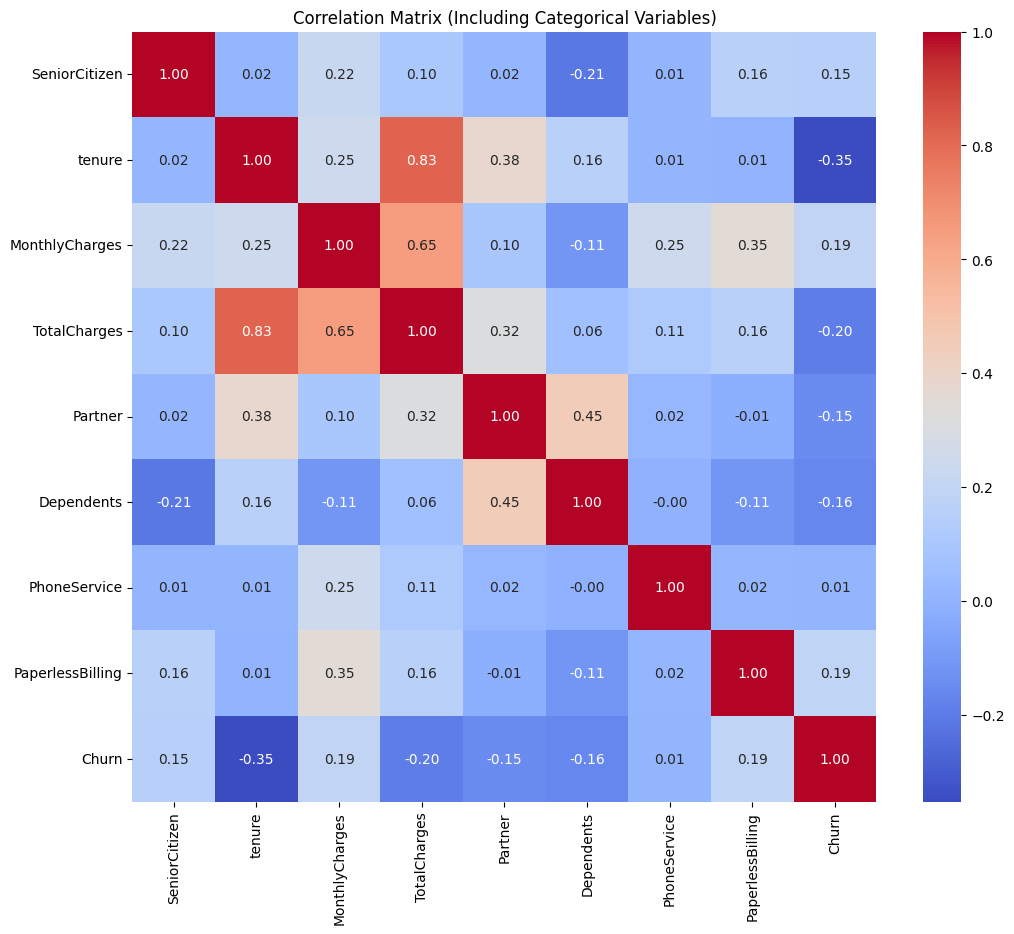

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df9=pd.read_csv("cleaned_dataset_iqr.csv")
numeric_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_columns:
    df9[col] = df9[col].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(12, 10))
sns.heatmap(df9[numeric_columns + binary_columns].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix (Including Categorical Variables)')
plt.show()



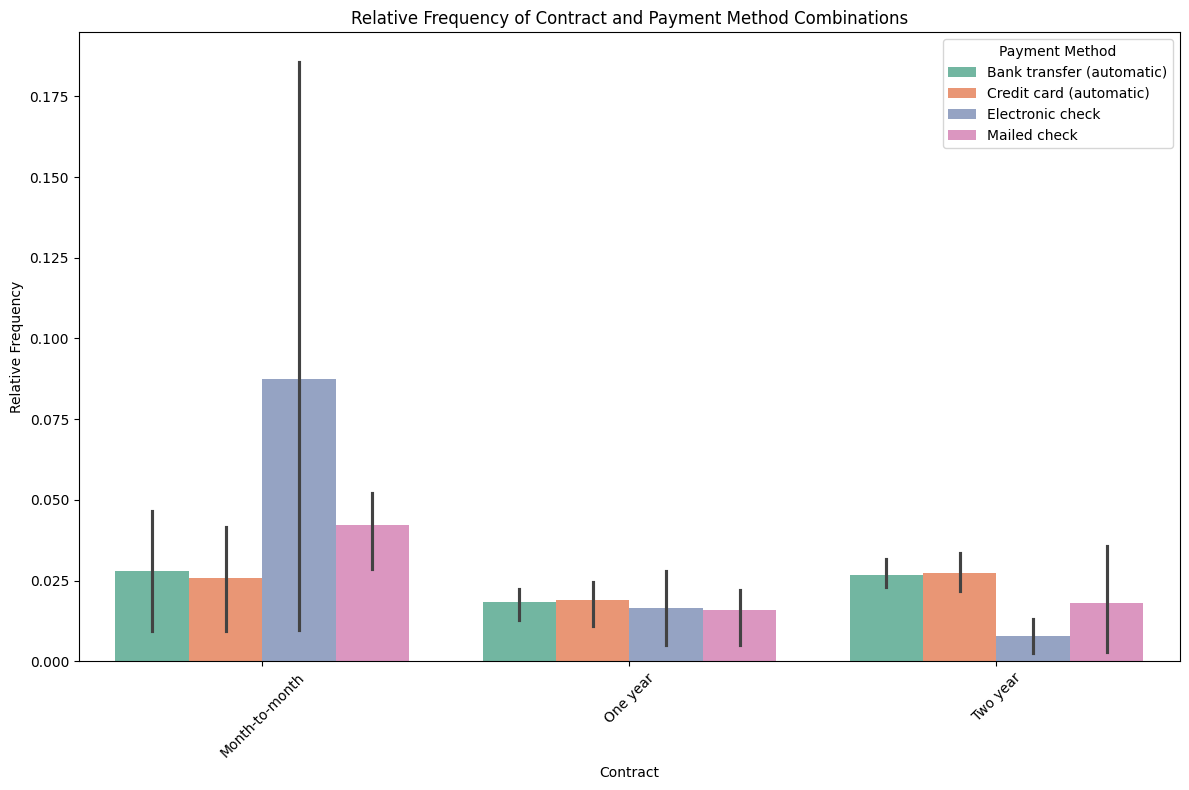

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df9 is your DataFrame with the relevant fields
# Calculate churn percentage for each combination
churn_percentage = df9.groupby(['Contract', 'PaymentMethod', 'InternetService'])['Churn'].mean().reset_index()
churn_percentage['Churn'] *= 100  # Convert churn to percentage

# Calculate relative frequencies
total_counts = len(df9)
combination_counts = df9.groupby(['Contract', 'PaymentMethod', 'InternetService']).size().reset_index(name='Counts')
combination_counts['Relative Frequency'] = combination_counts['Counts'] / total_counts

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Contract', y='Relative Frequency', hue='PaymentMethod', 
            data=combination_counts, palette='Set2')

plt.title('Relative Frequency of Contract and Payment Method Combinations')
plt.xlabel('Contract')
plt.ylabel('Relative Frequency')
plt.legend(title='Payment Method', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


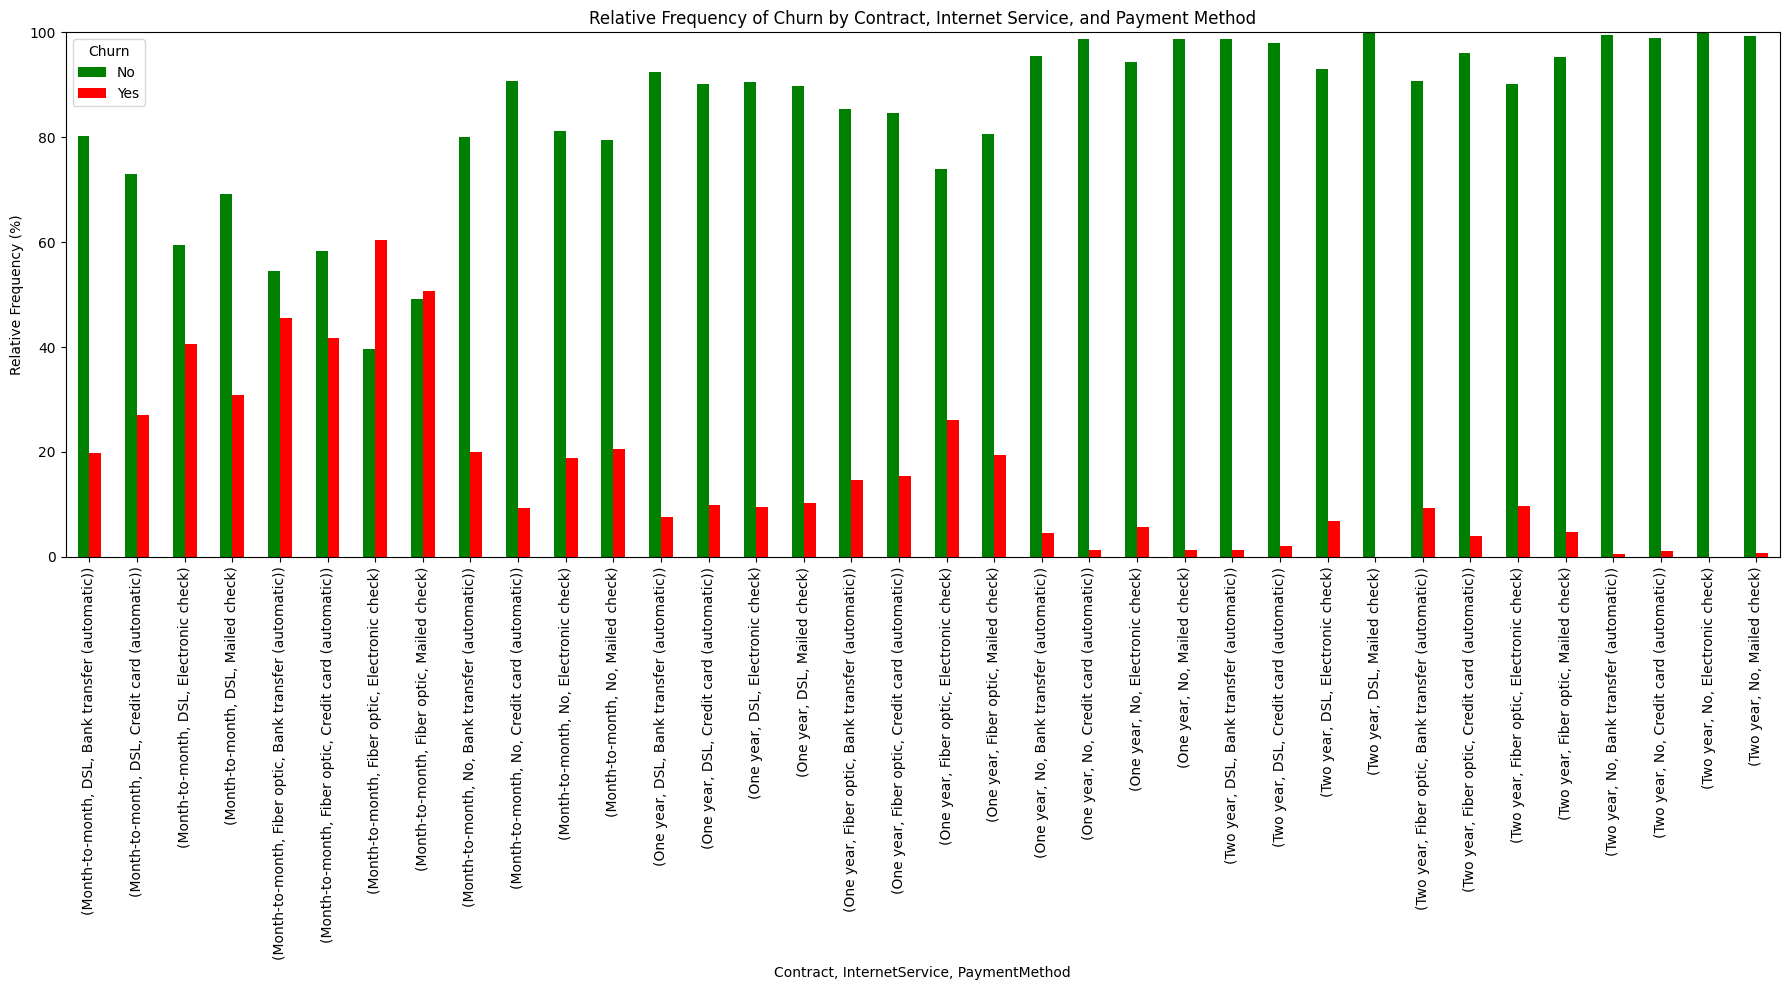

Findings: Most of the users who churned had a Month-to-month contract and used Fiber optic for internet service with Electronic check as the payment method.


In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data frame based on your provided columns
df_churn = pd.read_csv("cleaned_dataset_iqr.csv")

# Calculate relative frequencies
cat_var_1 = 'Contract'
cat_var_2 = 'InternetService'
cat_var_3 = 'PaymentMethod'
target_variable = df_churn['Churn']

# Group by the specified categorical variables and calculate relative frequencies
cat_grouped_by_cat_target = pd.crosstab(index=[df_churn[cat_var_1], df_churn[cat_var_2], df_churn[cat_var_3]],
                                        columns=target_variable, normalize='index') * 100
cat_grouped_by_cat_target.rename({1: '% Churn', 0: '% Not Churn'}, axis=1, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(18,10))  # Increase figsize for larger plot

cat_grouped_by_cat_target.plot(kind='bar', color=['green', 'red'], ax=ax)

# Set labels and legend
ax.set_xlabel(f'{cat_var_1}, {cat_var_2}, {cat_var_3}')
ax.set_ylabel('Relative Frequency (%)')
ax.set_title('Relative Frequency of Churn by Contract, Internet Service, and Payment Method')

# Adjust y-axis scale for better visibility
ax.set_ylim(0, 100)  # Set the range of y-axis from 0 to 100

plt.legend(title='Churn', loc='best')

plt.tight_layout()
plt.show()

# Print findings
print("Findings: Most of the users who churned had a Month-to-month contract and used Fiber optic for internet service with Electronic check as the payment method.")


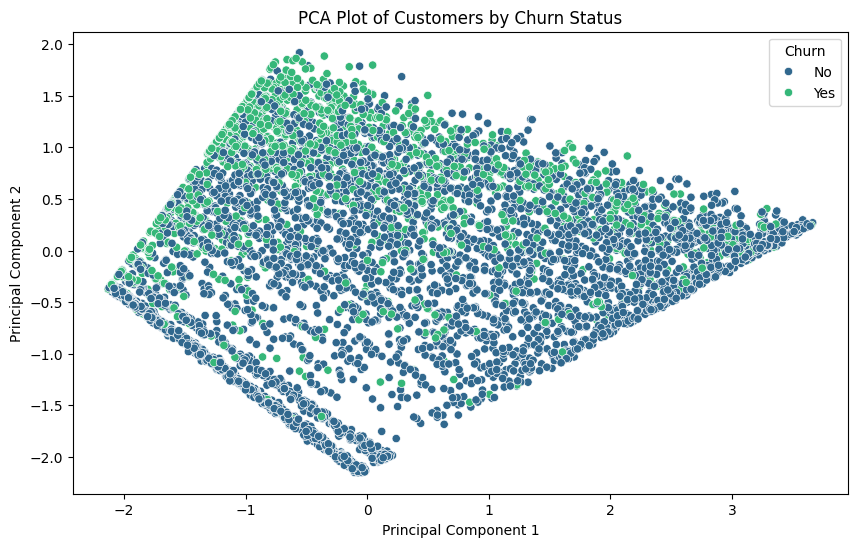

Explained variance ratio by PC1 and PC2: [0.7266421 0.2532504]


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


features = df[[ 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

features = features.dropna()

X = features.drop(columns=['Churn'])
y = features['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2) 
pca_result = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Churn'] = y.reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Churn', data=pca_df, palette='viridis')
plt.title('PCA Plot of Customers by Churn Status')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Churn', loc='upper right')
plt.show()

print(f"Explained variance ratio by PC1 and PC2: {pca.explained_variance_ratio_}")


In [65]:
def multivariate_analysis(cat_var_1, cat_var_2, cat_var_3, target_variable=df_churn.Churn):
    
    fig,ax = plt.subplots(1,1,figsize = (18,5))
    font_size = 15
    cat_grouped_by_cat_target = pd.crosstab(index = [cat_var_1, cat_var_2, cat_var_3],
                                        columns = target_variable, normalize = "index")*100                            
    cat_grouped_by_cat_target.rename({"Yes":"% Churn", "No":"% Not Churn"}, axis = 1, inplace = True)
    cat_grouped_by_cat_target.plot.bar(color = ["green", "red"],ax=ax)
    ax.set_xlabel(f"{cat_var_1.name}, {cat_var_2.name}, {cat_var_3.name}", fontsize = font_size)
    ax.set_ylabel("Relative Frequency(%)", fontsize = font_size)
    ax.tick_params(axis="x", labelsize=font_size)
    ax.tick_params(axis="y", labelsize=font_size)
    plt.legend(loc = "best")
    return plt.show()

In [66]:
# multivariate_analysis(df_churn.MultipleLines, df_churn['tenure'] ,df_churn.PhoneService)


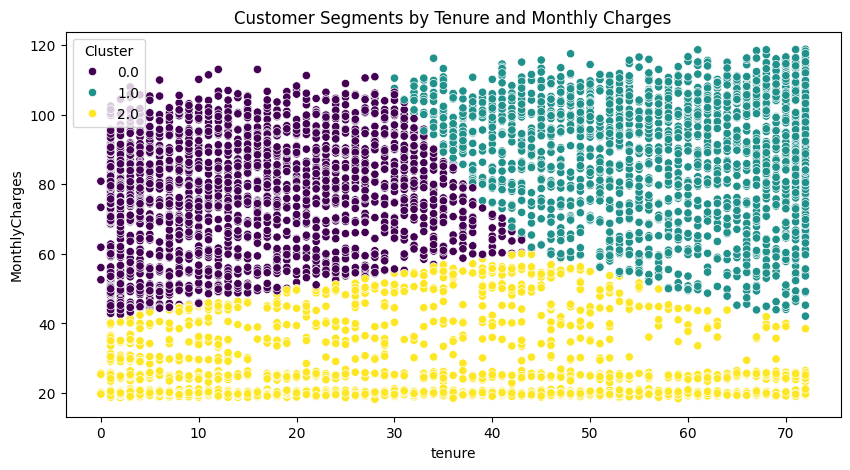

In [67]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

features = df[['tenure', 'MonthlyCharges', 'TotalCharges']].copy()
features['TotalCharges'] = pd.to_numeric(features['TotalCharges'], errors='coerce')
features = features.dropna()

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

df['Cluster'] = np.nan
df.loc[features.index, 'Cluster'] = clusters

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Cluster', palette='viridis')
plt.title('Customer Segments by Tenure and Monthly Charges')
plt.show()




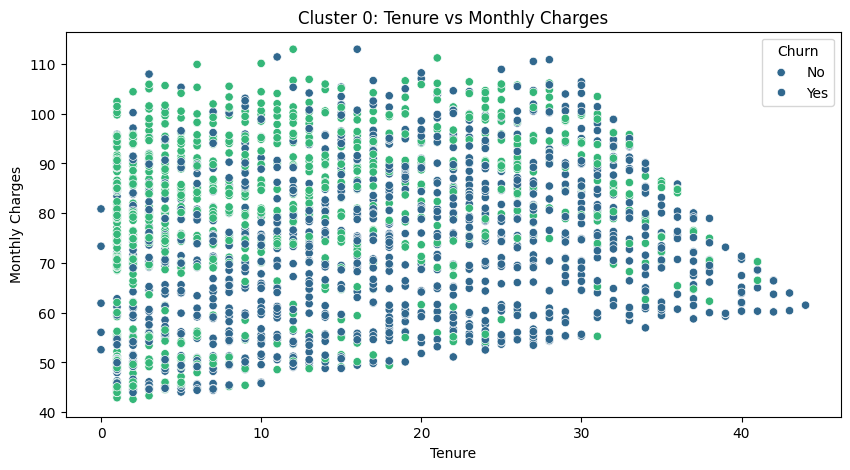

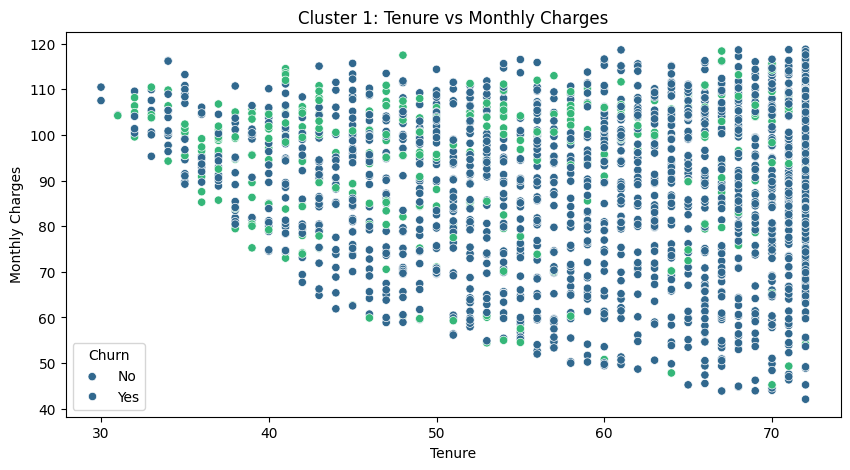

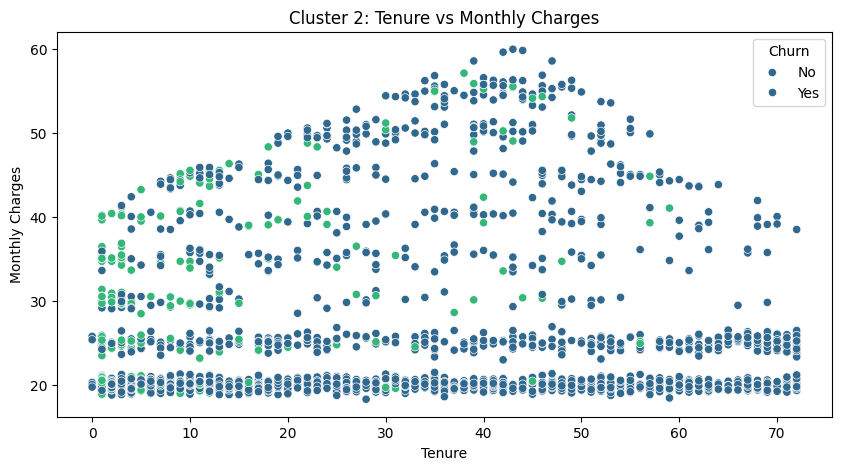

In [68]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


features = df[['tenure', 'MonthlyCharges', 'TotalCharges']].copy()
features['TotalCharges'] = pd.to_numeric(features['TotalCharges'], errors='coerce')
features = features.dropna()
# Filter data by clusters
cluster_0 = df[df['Cluster'] == 0]
cluster_1 = df[df['Cluster'] == 1]
cluster_2 = df[df['Cluster'] == 2]

# Plotting for Cluster 0
plt.figure(figsize=(10, 5))
sns.scatterplot(data=cluster_0, x='tenure', y='MonthlyCharges', hue='Churn', palette='viridis')
plt.title('Cluster 0: Tenure vs Monthly Charges')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# Plotting for Cluster 1
plt.figure(figsize=(10, 5))
sns.scatterplot(data=cluster_1, x='tenure', y='MonthlyCharges', hue='Churn', palette='viridis')
plt.title('Cluster 1: Tenure vs Monthly Charges')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# Plotting for Cluster 2
plt.figure(figsize=(10, 5))
sns.scatterplot(data=cluster_2, x='tenure', y='MonthlyCharges', hue='Churn', palette='viridis')
plt.title('Cluster 2: Tenure vs Monthly Charges')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()



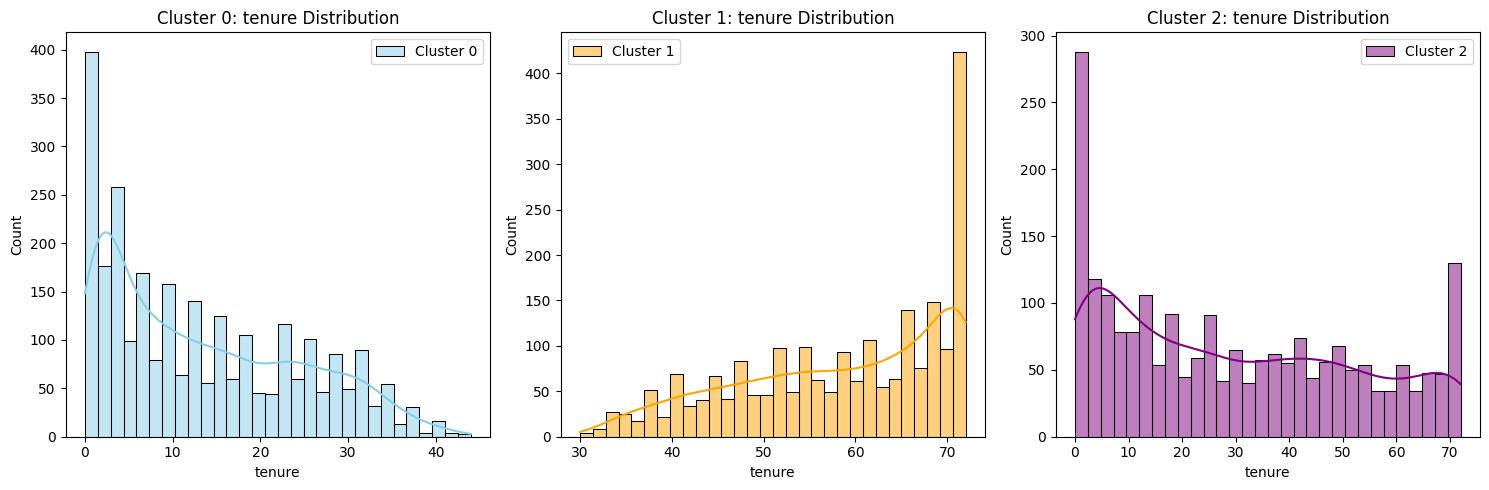

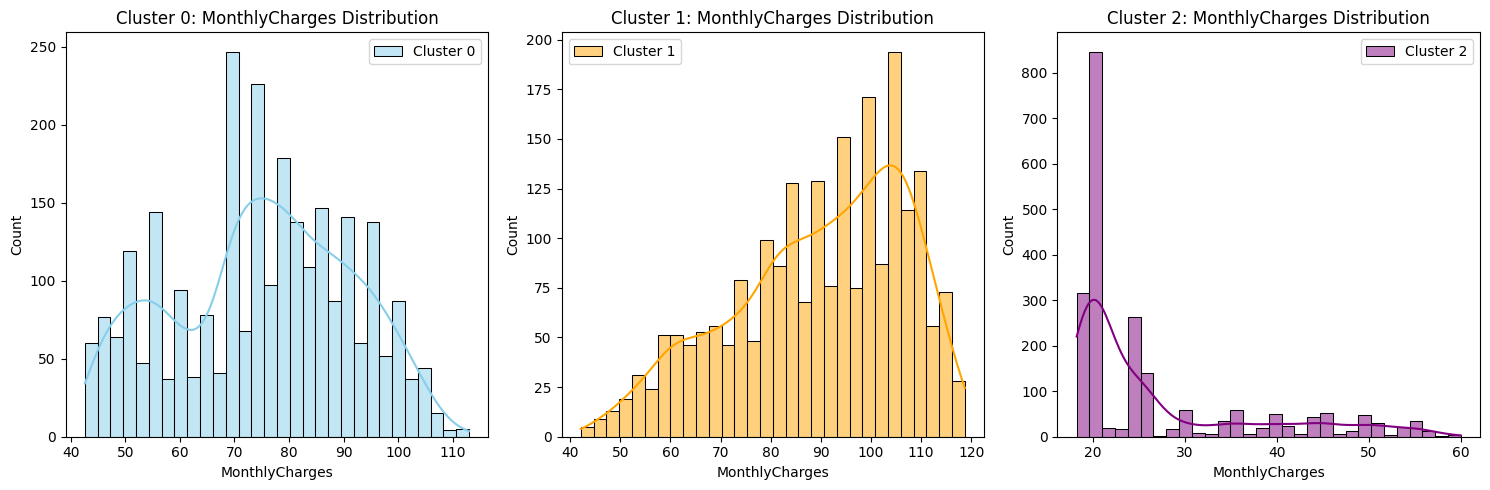

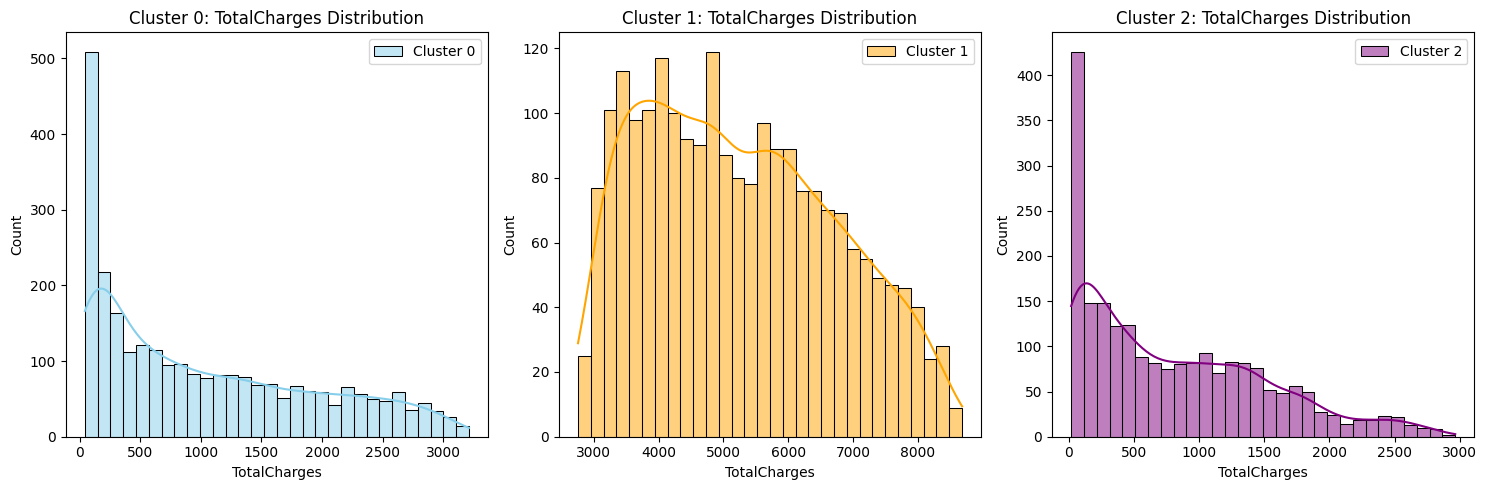

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the three clusters
cluster_0 = df[df['Cluster'] == 0]
cluster_1 = df[df['Cluster'] == 1]
cluster_2 = df[df['Cluster'] == 2]

# Define numerical features to plot
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plot histograms for each feature across clusters
for feature in numerical_features:
    plt.figure(figsize=(15, 5))
    
    # Plot for Cluster 0
    plt.subplot(1, 3, 1)
    sns.histplot(cluster_0[feature], bins=30, kde=True, color='skyblue', label='Cluster 0')
    sns.histplot(cluster_0[cluster_0['Churn'] == 1][feature], bins=30, kde=True, color='red', label='Churn = Yes')
    sns.histplot(cluster_0[cluster_0['Churn'] == 0][feature], bins=30, kde=True, color='green', label='Churn = No')
    plt.title(f'Cluster 0: {feature} Distribution')
    plt.legend()
    
    # Plot for Cluster 1
    plt.subplot(1, 3, 2)
    sns.histplot(cluster_1[feature], bins=30, kde=True, color='orange', label='Cluster 1')
    sns.histplot(cluster_1[cluster_1['Churn'] == 1][feature], bins=30, kde=True, color='red', label='Churn = Yes')
    sns.histplot(cluster_1[cluster_1['Churn'] == 0][feature], bins=30, kde=True, color='green', label='Churn = No')
    plt.title(f'Cluster 1: {feature} Distribution')
    plt.legend()
    
    # Plot for Cluster 2
    plt.subplot(1, 3, 3)
    sns.histplot(cluster_2[feature], bins=30, kde=True, color='purple', label='Cluster 2')
    sns.histplot(cluster_2[cluster_2['Churn'] == 1][feature], bins=30, kde=True, color='red', label='Churn = Yes')
    sns.histplot(cluster_2[cluster_2['Churn'] == 0][feature], bins=30, kde=True, color='green', label='Churn = No')
    plt.title(f'Cluster 2: {feature} Distribution')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


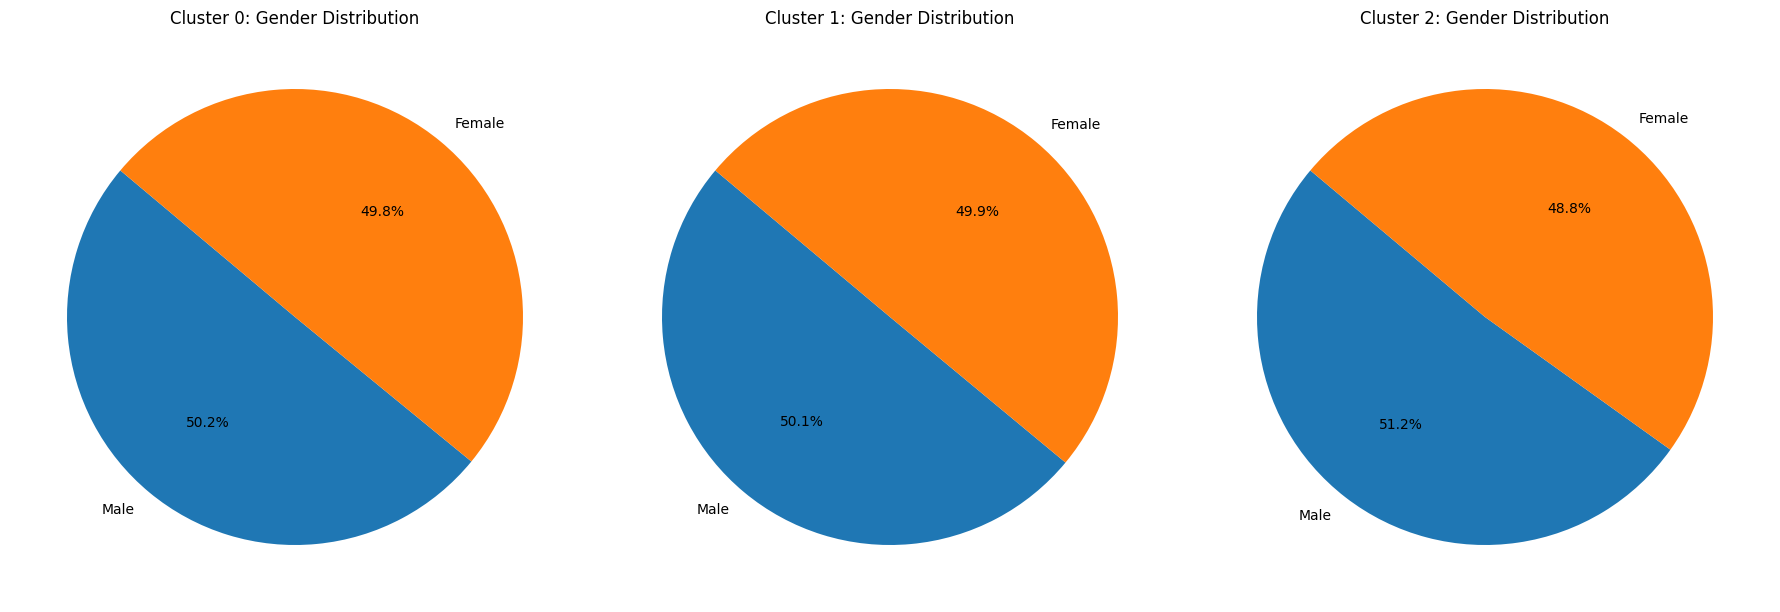

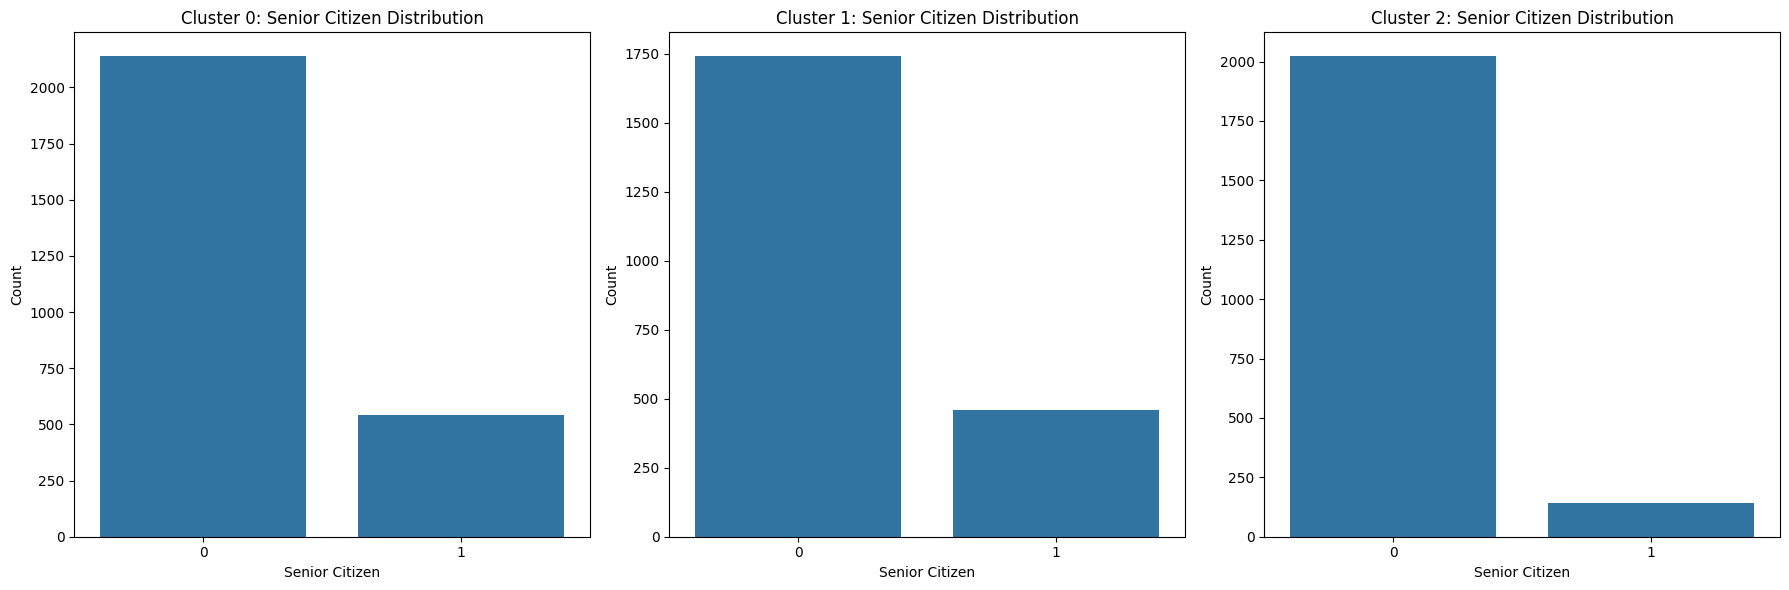

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the three clusters
cluster_0 = df[df['Cluster'] == 0]
cluster_1 = df[df['Cluster'] == 1]
cluster_2 = df[df['Cluster'] == 2]

# Function to plot gender distribution pie charts for each cluster
def plot_gender_piecharts(clusters, cluster_titles):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, (cluster_df, cluster_title) in enumerate(zip(clusters, cluster_titles)):
        gender_counts = cluster_df['gender'].value_counts()
        axes[i].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
        axes[i].set_title(f'{cluster_title}: Gender Distribution')

    plt.tight_layout()
    plt.show()

# Define cluster titles
cluster_titles = ['Cluster 0', 'Cluster 1', 'Cluster 2']

# Plot gender distribution pie charts for each cluster
plot_gender_piecharts([cluster_0, cluster_1, cluster_2], cluster_titles)



# Function to plot senior citizen distribution bar plots for each cluster
def plot_senior_barplots(clusters, cluster_titles):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, (cluster_df, cluster_title) in enumerate(zip(clusters, cluster_titles)):
        senior_counts = cluster_df['SeniorCitizen'].value_counts()
        sns.barplot(x=senior_counts.index, y=senior_counts.values, ax=axes[i])
        axes[i].set_title(f'{cluster_title}: Senior Citizen Distribution')
        axes[i].set_xlabel('Senior Citizen')
        axes[i].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

# Plot senior citizen distribution bar plots for each cluster
plot_senior_barplots([cluster_0, cluster_1, cluster_2], cluster_titles)



In [71]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd


df_basket = df[['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                'PaperlessBilling', 'PaymentMethod', 'Churn']]
df_basket=df_basket[df_basket["Churn"]=="Yes"]

df_basket_encoded = pd.get_dummies(df_basket)

frequent_itemsets = apriori(df_basket_encoded, min_support=0.05, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

print(rules.head())


             antecedents            consequents  antecedent support  \
0  (InternetService_DSL)   (OnlineSecurity_Yes)            0.245586   
1   (OnlineSecurity_Yes)  (InternetService_DSL)            0.157838   
2  (InternetService_DSL)      (OnlineBackup_No)            0.245586   
3      (OnlineBackup_No)  (InternetService_DSL)            0.659711   
4  (DeviceProtection_No)  (InternetService_DSL)            0.647940   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.157838  0.059925    0.244009  1.545940  0.021162    1.113983   
1            0.245586  0.059925    0.379661  1.545940  0.021162    1.216132   
2            0.659711  0.183521    0.747277  1.132733  0.021505    1.346488   
3            0.245586  0.183521    0.278183  1.132733  0.021505    1.045160   
4            0.245586  0.182986    0.282411  1.149949  0.023861    1.051318   

   zhangs_metric  
0       0.468104  
1       0.419331  
2       0.155325  
3       0.344353  
4  

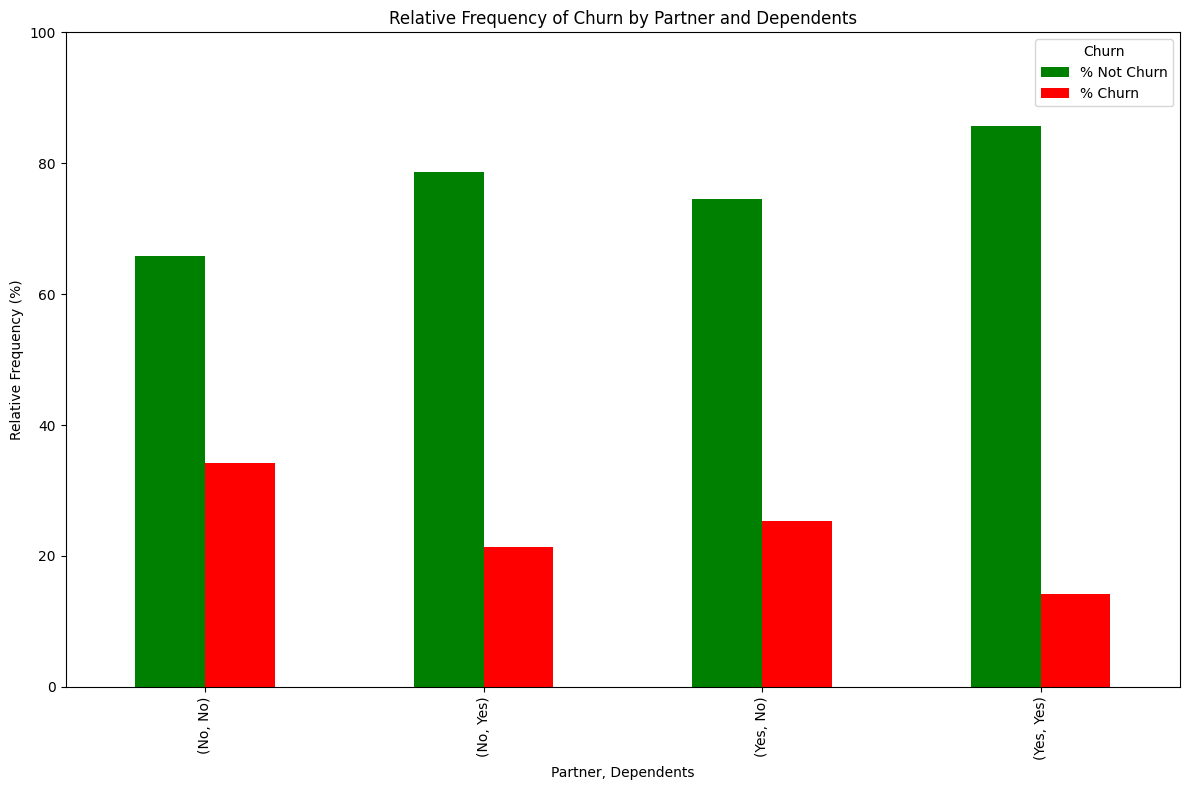

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

df_churn=pd.read_csv("cleaned_dataset_iqr.csv")

df_churn['Churn_Num'] = df_churn['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

cat_var_1 = 'Partner'
cat_var_2 = 'Dependents'
num_var = 'tenure'

cat_grouped_by_cat_target = pd.crosstab(index=[df_churn[cat_var_1], df_churn[cat_var_2]],
                                        columns=df_churn['Churn_Num'], normalize='index') * 100
cat_grouped_by_cat_target.rename({1: '% Churn', 0: '% Not Churn'}, axis=1, inplace=True)

fig, ax = plt.subplots(figsize=(12, 8))  

cat_grouped_by_cat_target.plot(kind='bar', color=['green', 'red'], ax=ax)
ax.set_xlabel(f'{cat_var_1}, {cat_var_2}')
ax.set_ylabel('Relative Frequency (%)')
ax.set_title('Relative Frequency of Churn by Partner and Dependents')
ax.set_ylim(0, 100)  
ax.legend(title='Churn', loc='best')

plt.tight_layout()
plt.show()



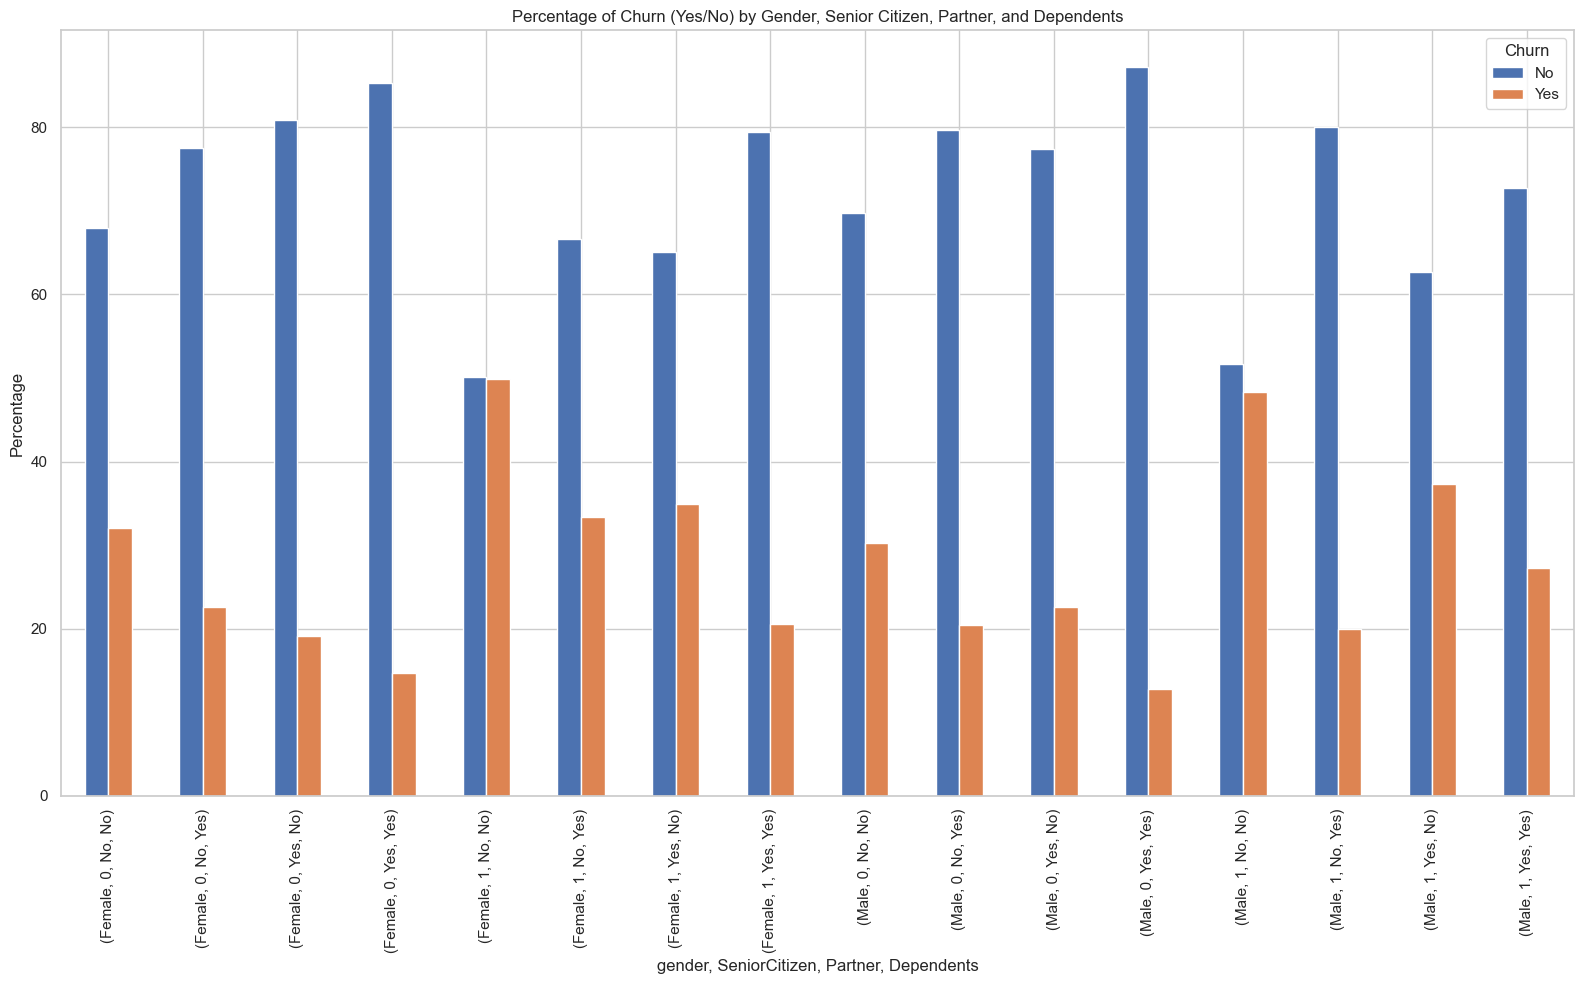

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (assuming you have df_churn loaded from your CSV)
df_churn = pd.read_csv("cleaned_dataset_iqr.csv")

# Define categorical variables
cat_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Calculate relative frequencies of Churn by combinations of categorical variables
cat_grouped_by_cat_target = pd.crosstab(index=[df_churn[var] for var in cat_vars],
                                        columns=df_churn['Churn'], normalize='index') * 100

# Extracting the first subplot: Grouped bar plot for Percentage of Churn by Gender, Senior Citizen, Partner, and Dependents
fig, ax = plt.subplots(figsize=(16, 10))  # Adjust figsize as needed

# Plotting grouped bars for Churn "Yes" and "No"
cat_grouped_by_cat_target.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel(', '.join(cat_vars))
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Churn (Yes/No) by Gender, Senior Citizen, Partner, and Dependents')

# Adjust legend position
ax.legend(title='Churn', loc='best')

plt.tight_layout()
plt.show()


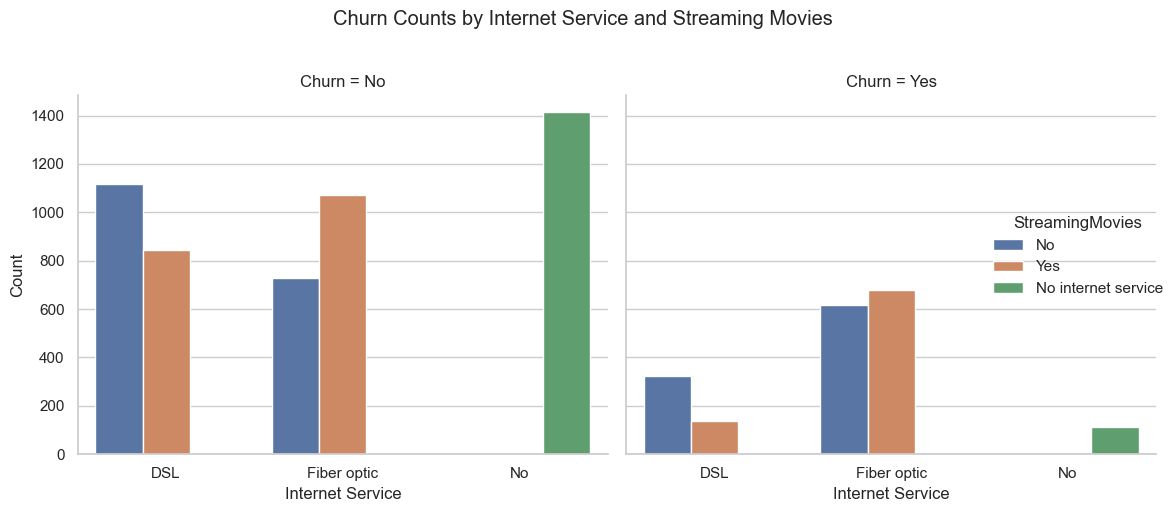

Findings: From the pairplot, customers with shorter tenure, higher monthly charges, and lower total charges are more likely to churn. Internet service type and streaming movies appear to influence churn rates significantly. Additionally, customers without online security and tech support tend to have higher monthly charges.


In [88]:





cat_plot = sns.catplot(x='InternetService', hue='StreamingMovies', col='Churn', data=df_churn, kind='count')
cat_plot.set_axis_labels('Internet Service', 'Count')
cat_plot.set_titles('Churn = {col_name}')
plt.suptitle('Churn Counts by Internet Service and Streaming Movies', y=1.02)
plt.tight_layout()
plt.show()


print("Findings: From the pairplot, customers with shorter tenure, higher monthly charges, and lower total charges are more likely to churn. Internet service type and streaming movies appear to influence churn rates significantly. Additionally, customers without online security and tech support tend to have higher monthly charges.")
